In [80]:
import pygmsh
import numpy as np
import matplotlib.pyplot as plt

def embed_line(geom, pt1, pt2, surf):
    gmsh_pt1 = geom.add_point(pt1, surf.lcar)
    gmsh_pt2 = geom.add_point(pt2, surf.lcar)
    line = geom.add_line(gmsh_pt1, gmsh_pt2)
    intersection_code = 'Line{{{}}} In Surface{{{}}};'.format(
        line.id, surf.surface.id
    )
    geom.add_raw_code(intersection_code)

geom = pygmsh.built_in.Geometry()
mesh_size = 0.05
center = [0,0]
w = 1.0
surf_corners = np.array([
    [center[0] - w, center[1] - w, 0],
    [center[0] + w, center[1] - w, 0],
    [center[0] + w, center[1] + w, 0],
    [center[0] - w, center[1] + w, 0],
])
surf = geom.add_polygon(surf_corners, mesh_size)

embed_line(geom, [-0.5, 0.4, 0], [0.15, -0.2, 0], surf)
embed_line(geom, [0.1, 0.1, 0], [0.7, 0.3, 0], surf)

points_1, cells_1, _, _, _ = pygmsh.generate_mesh(
    geom, dim = 1, num_lloyd_steps = 0, num_quad_lloyd_steps = 0
)
points_2, cells_2, _, _, _ = pygmsh.generate_mesh(
    geom, dim = 2, num_lloyd_steps = 0, num_quad_lloyd_steps = 0
)
np.save('fig_meshes.npy', [points_1, cells_1, points_2, cells_2])

Info    : Running 'gmsh -1 -bin /tmp/tmpkrh93fvt.geo -o /tmp/tmp6nsc6vlf.msh' [Gmsh 3.0.5, 1 node, max. 1 thread]
Info    : Started on Mon Oct 16 14:57:49 2017
Info    : Reading '/tmp/tmpkrh93fvt.geo'...
Info    : Done reading '/tmp/tmpkrh93fvt.geo'
Info    : Finalized high order topology of periodic connections
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Done meshing 1D (0.000966 s)
Info    : 193 vertices 199 elements
Info    : Writing '/tmp/tmp6nsc6vlf.msh'...
Info    : Done writing '/tmp/tmp6nsc6vlf.msh'
Info    : Stopped on Mon Oct 16 14:57:49 2017
Not performing Lloyd smoothing (only works for flat triangular meshes).
Info    : Running 'gmsh -2 -bin /tmp/tmpjyo_spmg.geo -o /tmp/tmpb1pcvlc7.msh' [Gmsh 3.0.5, 1 node, max. 1 thread]
Info    : Started on Mon Oct 16 14:57:49 2017
Info    : Reading '/t

In [81]:
import numpy as np
import matplotlib.pyplot as plt
points_1, cells_1, points_2, cells_2 = np.load('fig_meshes.npy')

In [82]:
%config InlineBackend.figure_format = 'retina'

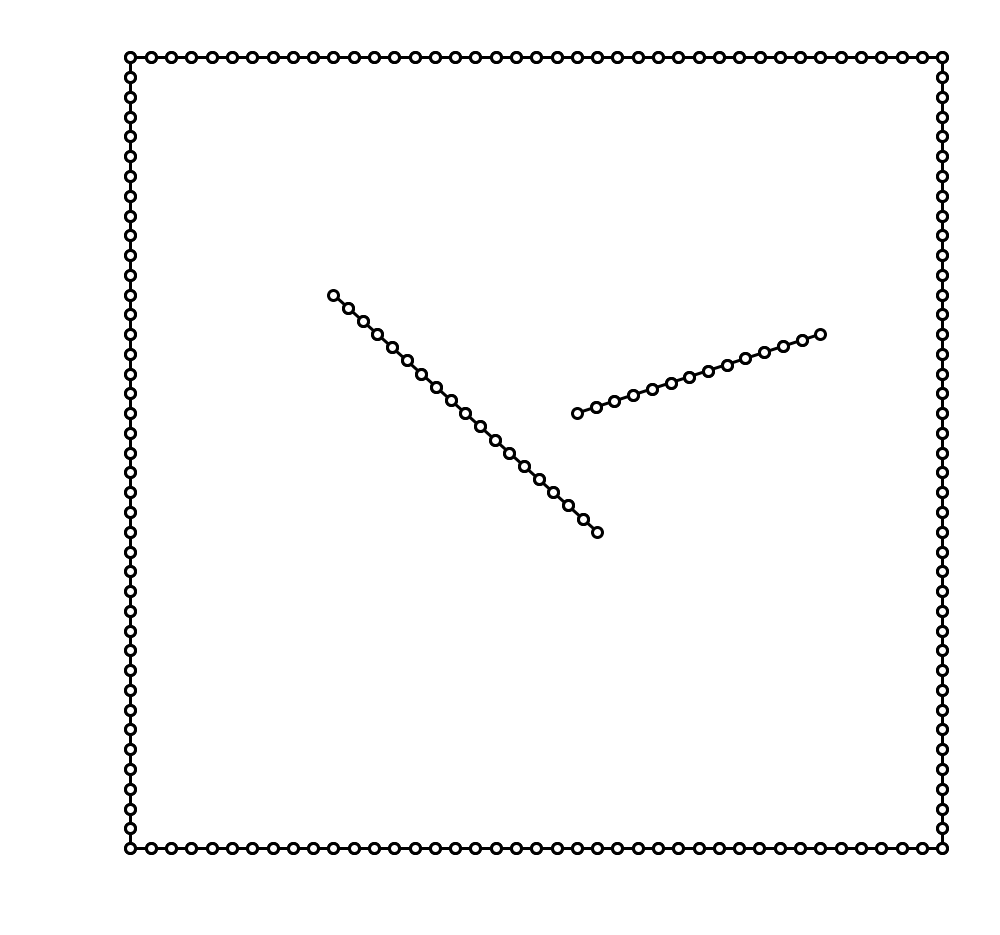

In [90]:
plt.figure(figsize = (8,8))
for i, L in enumerate(cells_1['line'].tolist()):
    L_pts = points_1[L,:]
    plt.plot(L_pts[:,0], L_pts[:,1], 'k-o', markersize=5, markerfacecolor = 'white', fillstyle='full', markeredgecolor='black', markeredgewidth=1.5)
plt.axis('off')
plt.savefig('boundary_mesh.pdf', bbox_inches = 'tight')
plt.show()

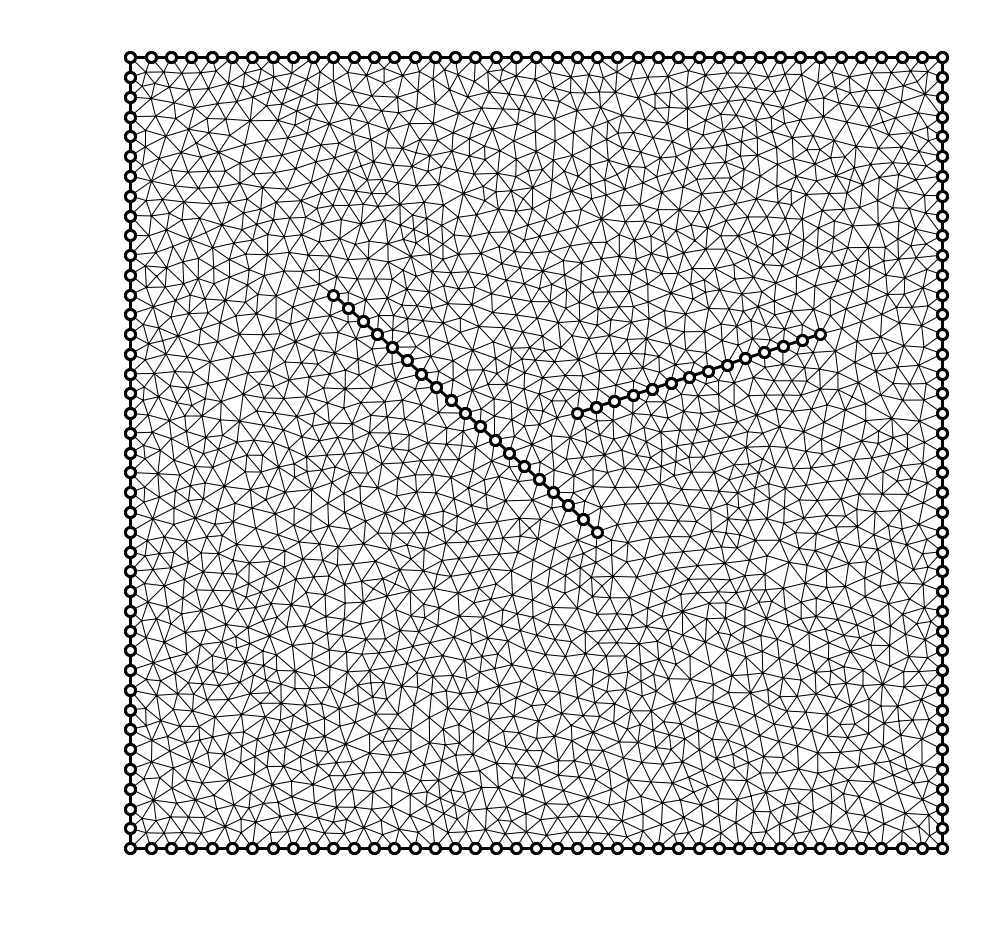

In [88]:
plt.figure(figsize = (8,8))
plt.triplot(points_2[:,0], points_2[:,1], cells_2['triangle'], 'k-', linewidth = 0.5)
for i, L in enumerate(cells_1['line'].tolist()):
    L_pts = points_1[L,:]
    plt.plot(L_pts[:,0], L_pts[:,1], 'k-o', markersize=5, markerfacecolor = 'white', fillstyle='full', markeredgecolor='black', markeredgewidth=1.5)
plt.axis('off')
plt.savefig('interior_mesh.pdf', bbox_inches = 'tight')
plt.show()

In [89]:
print('Number of boundary elements: ' + str(cells_1['line'].shape[0]))
print('Number of interior elements: ' + str(cells_2['triangle'].shape[0]))

Number of boundary elements: 191
Number of interior elements: 4254
